In [31]:
import xarray as xr
import numpy as np
import netCDF4
import gsw
import os.path as op
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
ds = xr.open_dataset("https://podaac-opendap.jpl.nasa.gov/opendap/OceanTemperature/amsre/L3/sst_1deg_1mo/tos_AMSRE_L3_v7_200206-201012.nc")
# ds = xr.open_dataset("https://podaac-opendap.jpl.nasa.gov/opendap/OceanTemperature/avhrr/L3/navo_mcsst_18km/night/noaa16/2005/2005047n18N16.dat.gz")
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, time: 103)
Coordinates:
  * time       (time) datetime64[ns] 2002-06-16 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes:
    institution:                     Remote Sensing Systems
    institute_id:                    REMSS
    experiment_id:                   obs
    source:                          Sea Surface Temperature from AMSR-E onbo...
    model_id:                        Obs-AMSRE
    contact:                         support@remss.com
    tracking_id:                     2e41e817-3a79-485a-8336-7993544aee62
    instrument:                      AMSRE
    obs_project:                     AMSRE
    source_type:                     satellite_retrieval
    data_structure:                  grid
    processing_level:                L3
    processing_version:              v7
    mip_specs:                       CMIP5
    realm:                           ocean
    source_id:                       AMSRE
    product:                         observations
    frequency:                       mon
    creation_date:                   2011-10-25T18:51:27Z
    history:                         2011-10-25T18:51:27Z CMOR rewrote data t...
    Conventions:                     CF-1.4
    project_id:                      obs4MIPs
    table_id:                        Table Omon_obs (31 January 2011) 3852a2b...
    title:                           Obs-AMSRE model output prepared for obs4...
    modeling_realm:                  ocean
    cmor_version:                    2.5.3
    DODS_EXTRA.Unlimited_Dimension:  time

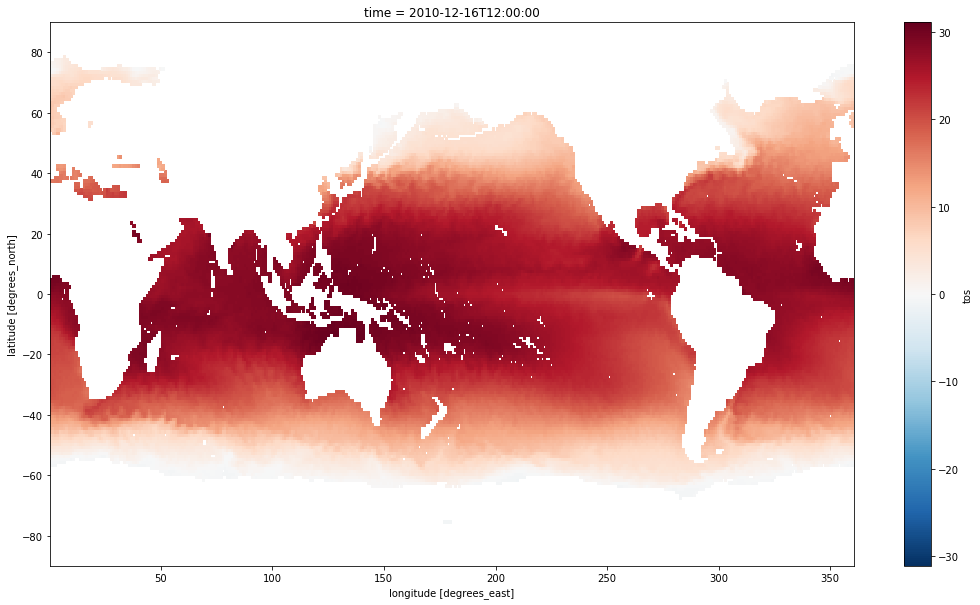

In [4]:
(ds.tos[-1]-273.15).plot(figsize=(18,10))

In [70]:
xx,yy = np.meshgrid(ds.lon, ds.lat)
dx = xr.DataArray(gsw.distance(xx, yy, axis=1), dims=['lat','lon'], 
                  coords={'lat':ds.lat.data,'lon':ds.lon.data[1:]}
                 )
dy = xr.DataArray(gsw.distance(xx, yy, axis=0), dims=['lat','lon'],
                  coords={'lat':ds.lat.data[1:],'lon':ds.lon.data}
                 )
dx

<xarray.DataArray (lat: 180, lon: 359)>
array([[ 970.33415957,  970.33415957,  970.33415957, ...,  970.33415957,
         970.33415957,  970.33415957],
       [2910.70692802, 2910.70692802, 2910.70692802, ..., 2910.70692802,
        2910.70692802, 2910.70692802],
       [4850.19313439, 4850.19313439, 4850.19313439, ..., 4850.19313439,
        4850.19313439, 4850.19313439],
       ...,
       [4850.19313439, 4850.19313439, 4850.19313439, ..., 4850.19313439,
        4850.19313439, 4850.19313439],
       [2910.70692802, 2910.70692802, 2910.70692802, ..., 2910.70692802,
        2910.70692802, 2910.70692802],
       [ 970.33415957,  970.33415957,  970.33415957, ...,  970.33415957,
         970.33415957,  970.33415957]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2.0 3.0 4.0 5.0 6.0 ... 356.0 357.0 358.0 359.0 360.0

In [88]:
dtdx = xr.DataArray((ds.tos.diff('lon',label='upper')*dx**-1).data,
                   dims=['time','lat','lon'], 
                   coords={'time':ds.time.data,'lat':ds.lat.data,'lon':.5*(ds.lon.data[1:]+ds.lon.data[:-1])}
                   )
dtdy = xr.DataArray((ds.tos.diff('lat',label='upper')*dy**-1).data,
                   dims=['time','lat','lon'],
                   coords={'time':ds.time.data,'lat':.5*(ds.lat.data[1:]+ds.lat.data[:-1]),'lon':ds.lon.data}
                   ).interp({'lon':.5*(ds.lon.data[1:]+ds.lon.data[:-1]),
                             'lat':ds.lat.data})
gradt = dtdx**2 + dtdy**2
gradt

<xarray.DataArray (time: 103, lat: 180, lon: 359)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-06-16 ... 2010-12-16T12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 1.5 2.5 3.5 4.5 5.5 ... 355.5 356.5 357.5 358.5 359.5

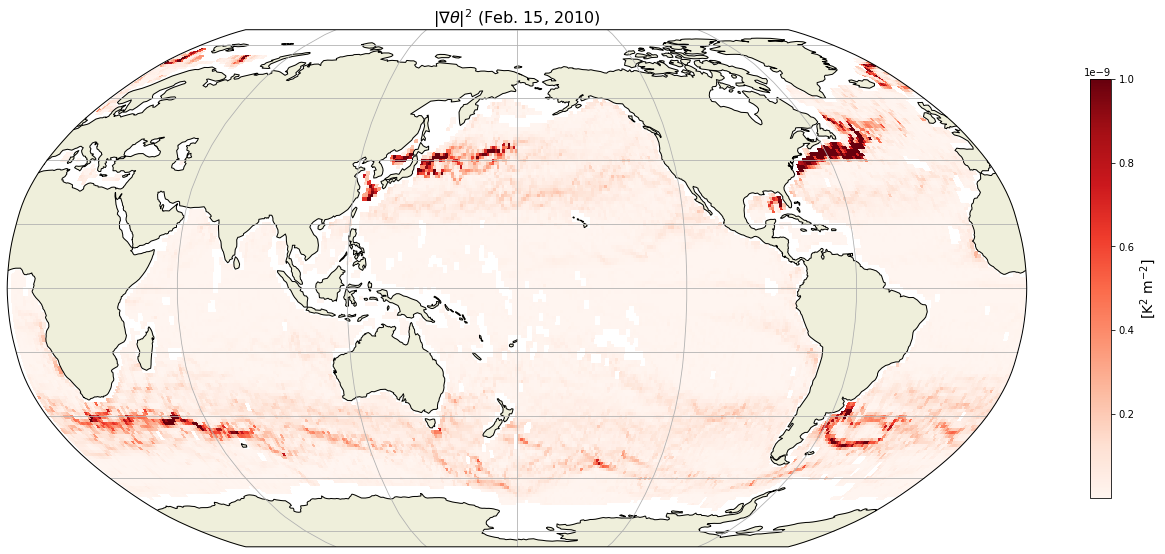

In [102]:
lons,lats = np.meshgrid(gradt.lon, gradt.lat)
fig = plt.figure(figsize=(18,10))
fig.set_tight_layout(True)
ax = fig.add_subplot(projection=ccrs.Robinson(central_longitude=180))
im = ax.pcolormesh(lons, lats, 
                  gradt.sel(time='2010-02-15',method='nearest')[0], 
                  transform=ccrs.PlateCarree(),
                  vmax=1e-9, cmap='Reds', rasterized=True)
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.set_title(r"$|\nabla\theta|^2$ (Feb. 15, 2010)", fontsize=16)
cbar = fig.colorbar(im, ax=ax, shrink=.6)
cbar.set_label(r"[K$^2$ m$^{-2}$]", fontsize=14)
plt.savefig('/swot/SUM04/takaya/gradSST2_AMSRE_1deg.pdf')

In [61]:
dsargo = xr.open_dataset('/swot/SUM05/takaya/ARGO/Argo_mixedlayers_monthlyclim_03192017.nc')
dsargo

<xarray.Dataset>
Dimensions:        (iLAT: 180, iLON: 360, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables:
    lat            (iLAT) float64 ...
    lon            (iLON) float64 ...
    month          (iMONTH) float64 ...
    mld_da_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 ...
    mld_da_median  (iLAT, iLON, iMONTH) float64 ...
    mld_dt_median  (iLAT, iLON, iMONTH) float64 ...
    mld_da_std     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_std     (iLAT, iLON, iMONTH) float64 ...
    mld_da_max     (iLAT, iLON, iMONTH) float64 ...
    mld_dt_max     (iLAT, iLON, iMONTH) float64 ...
    mlpd_da        (iLAT, iLON, iMONTH) float64 ...
    mlpd_dt        (iLAT, iLON, iMONTH) float64 ...
    mlt_da         (iLAT, iLON, iMONTH) float64 ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 ...
    mls_da         (iLAT, iLON, iMONTH) float64 ...
    mls_dt         (iLAT, iLON, iMONTH) float64 ...
    num            (iLAT, iLON, iMONTH) float64 ...
    longrid        (iLAT, iLON) float64 ...
    latgrid        (iLAT, iLON) float64 ...
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 736751...

In [62]:
argo_lon = dsargo.lon.data
argo_lon[argo_lon<0.] += 360.
argo_lon

array([180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5,
       189.5, 190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5,
       198.5, 199.5, 200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5,
       207.5, 208.5, 209.5, 210.5, 211.5, 212.5, 213.5, 214.5, 215.5,
       216.5, 217.5, 218.5, 219.5, 220.5, 221.5, 222.5, 223.5, 224.5,
       225.5, 226.5, 227.5, 228.5, 229.5, 230.5, 231.5, 232.5, 233.5,
       234.5, 235.5, 236.5, 237.5, 238.5, 239.5, 240.5, 241.5, 242.5,
       243.5, 244.5, 245.5, 246.5, 247.5, 248.5, 249.5, 250.5, 251.5,
       252.5, 253.5, 254.5, 255.5, 256.5, 257.5, 258.5, 259.5, 260.5,
       261.5, 262.5, 263.5, 264.5, 265.5, 266.5, 267.5, 268.5, 269.5,
       270.5, 271.5, 272.5, 273.5, 274.5, 275.5, 276.5, 277.5, 278.5,
       279.5, 280.5, 281.5, 282.5, 283.5, 284.5, 285.5, 286.5, 287.5,
       288.5, 289.5, 290.5, 291.5, 292.5, 293.5, 294.5, 295.5, 296.5,
       297.5, 298.5, 299.5, 300.5, 301.5, 302.5, 303.5, 304.5, 305.5,
       306.5, 307.5,

In [65]:
mld_feb = xr.DataArray(dsargo.mld_da_median[:,:,1].data, dims=['lat','lon'],
                      coords={'lat':dsargo.lat.data,'lon':argo_lon}
                      ).roll(lon=-180)
mld_feb

<xarray.DataArray (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [95]:
f = xr.apply_ufunc(gsw.f, gradt.lat)
f

<xarray.DataArray 'lat' (lat: 180)>
array([-1.45836747e-04, -1.45792323e-04, -1.45703490e-04, -1.45570275e-04,
       -1.45392717e-04, -1.45170871e-04, -1.44904805e-04, -1.44594599e-04,
       -1.44240348e-04, -1.43842161e-04, -1.43400157e-04, -1.42914473e-04,
       -1.42385255e-04, -1.41812666e-04, -1.41196879e-04, -1.40538082e-04,
       -1.39836475e-04, -1.39092274e-04, -1.38305703e-04, -1.37477003e-04,
       -1.36606426e-04, -1.35694238e-04, -1.34740716e-04, -1.33746150e-04,
       -1.32710845e-04, -1.31635114e-04, -1.30519286e-04, -1.29363700e-04,
       -1.28168709e-04, -1.26934677e-04, -1.25661979e-04, -1.24351003e-04,
       -1.23002148e-04, -1.21615826e-04, -1.20192459e-04, -1.18732480e-04,
       -1.17236333e-04, -1.15704476e-04, -1.14137374e-04, -1.12535504e-04,
       -1.10899355e-04, -1.09229425e-04, -1.07526223e-04, -1.05790267e-04,
       -1.04022086e-04, -1.02222219e-04, -1.00391215e-04, -9.85296297e-05,
       -9.66380319e-05, -9.47169971e-05, -9.27671106e-05, -9.07889664e-05,
       -8.87831670e-05, -8.67503233e-05, -8.46910547e-05, -8.26059883e-05,
       -8.04957594e-05, -7.83610107e-05, -7.62023924e-05, -7.40205622e-05,
       -7.18161846e-05, -6.95899311e-05, -6.73424798e-05, -6.50745153e-05,
       -6.27867285e-05, -6.04798163e-05, -5.81544813e-05, -5.58114319e-05,
       -5.34513819e-05, -5.10750500e-05, -4.86831601e-05, -4.62764409e-05,
       -4.38556254e-05, -4.14214511e-05, -3.89746594e-05, -3.65159957e-05,
       -3.40462088e-05, -3.15660511e-05, -2.90762781e-05, -2.65776482e-05,
       -2.40709224e-05, -2.15568645e-05, -1.90362401e-05, -1.65098171e-05,
       -1.39783650e-05, -1.14426550e-05, -8.90345942e-06, -6.36155178e-06,
       -3.81770635e-06, -1.27269801e-06,  1.27269801e-06,  3.81770635e-06,
        6.36155178e-06,  8.90345942e-06,  1.14426550e-05,  1.39783650e-05,
        1.65098171e-05,  1.90362401e-05,  2.15568645e-05,  2.40709224e-05,
        2.65776482e-05,  2.90762781e-05,  3.15660511e-05,  3.40462088e-05,
        3.65159957e-05,  3.89746594e-05,  4.14214511e-05,  4.38556254e-05,
        4.62764409e-05,  4.86831601e-05,  5.10750500e-05,  5.34513819e-05,
        5.58114319e-05,  5.81544813e-05,  6.04798163e-05,  6.27867285e-05,
        6.50745153e-05,  6.73424798e-05,  6.95899311e-05,  7.18161846e-05,
        7.40205622e-05,  7.62023924e-05,  7.83610107e-05,  8.04957594e-05,
        8.26059883e-05,  8.46910547e-05,  8.67503233e-05,  8.87831670e-05,
        9.07889664e-05,  9.27671106e-05,  9.47169971e-05,  9.66380319e-05,
        9.85296297e-05,  1.00391215e-04,  1.02222219e-04,  1.04022086e-04,
        1.05790267e-04,  1.07526223e-04,  1.09229425e-04,  1.10899355e-04,
        1.12535504e-04,  1.14137374e-04,  1.15704476e-04,  1.17236333e-04,
        1.18732480e-04,  1.20192459e-04,  1.21615826e-04,  1.23002148e-04,
        1.24351003e-04,  1.25661979e-04,  1.26934677e-04,  1.28168709e-04,
        1.29363700e-04,  1.30519286e-04,  1.31635114e-04,  1.32710845e-04,
        1.33746150e-04,  1.34740716e-04,  1.35694238e-04,  1.36606426e-04,
        1.37477003e-04,  1.38305703e-04,  1.39092274e-04,  1.39836475e-04,
        1.40538082e-04,  1.41196879e-04,  1.41812666e-04,  1.42385255e-04,
        1.42914473e-04,  1.43400157e-04,  1.43842161e-04,  1.44240348e-04,
        1.44594599e-04,  1.44904805e-04,  1.45170871e-04,  1.45392717e-04,
        1.45570275e-04,  1.45703490e-04,  1.45792323e-04,  1.45836747e-04])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

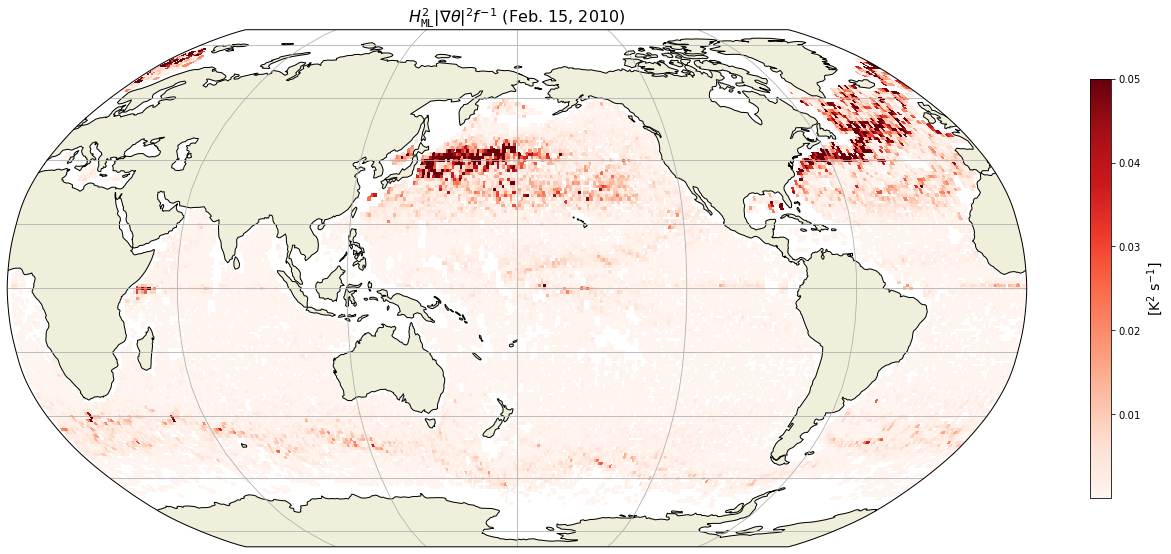

In [103]:
lons,lats = np.meshgrid(gradt.lon, gradt.lat)
fig = plt.figure(figsize=(18,10))
fig.set_tight_layout(True)
ax = fig.add_subplot(projection=ccrs.Robinson(central_longitude=180))
im = ax.pcolormesh(lons, lats, 
                  gradt.sel(time='2010-02-15',method='nearest')[0]
                  * mld_feb**2 * np.abs(f)**-1, 
                  transform=ccrs.PlateCarree(),
                  vmax=5e-2, cmap='Reds', rasterized=True)
ax.coastlines()
ax.gridlines()
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.set_title(r"$H_{\tt ML}^2|\nabla\theta|^2 f^{-1}$ (Feb. 15, 2010)", fontsize=16)
cbar = fig.colorbar(im, ax=ax, shrink=.6)
cbar.set_label(r"[K$^2$ s$^{-1}$]", fontsize=14)
plt.savefig('/swot/SUM04/takaya/gradSST2H2_AMSRE_1deg.pdf')

In [96]:
gradt.sel(time='2010-02-15',method='nearest')[0]* mld_feb**2 * f**-1

<xarray.DataArray (lat: 180, lon: 359)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 1.5 2.5 3.5 4.5 5.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 2010-02-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5